In [1]:
import numpy as np
import joblib as jl
import matplotlib.pyplot as plt
from astropy.table import Table
from tqdm import tqdm

cachedir = '.cache'
mem = jl.Memory(cachedir)
histogram = mem.cache(np.histogram)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('figure', dpi=120)
plt.rc('savefig', bbox='tight')

cols = ['RA', 'DEC', 'photo_z', 'MASS_BEST']
# download from https://www.scidb.cn/en/file?fid=92b8d8273c8c70e8db718a1e22bb331c&mode=front
tbl = Table.read('data/desidr9_galaxy_cspcat.fits', memmap=True)
# run the data/preprocess.sh script
cut_tbl = Table.read('data/desidr9_galaxy_cspcat_spec.fits', memmap=True)

z_bins = np.linspace(0, 1.8, 100)
mass_bins = np.linspace(7, 13, 100)
joint_bins = (z_bins, mass_bins)

photo_z_hist = jl.load('.cache/photo_z_hist.pkl')
mass_hist = jl.load('.cache/mass_hist.pkl')
joint_hist = jl.load('.cache/joint_hist.pkl')

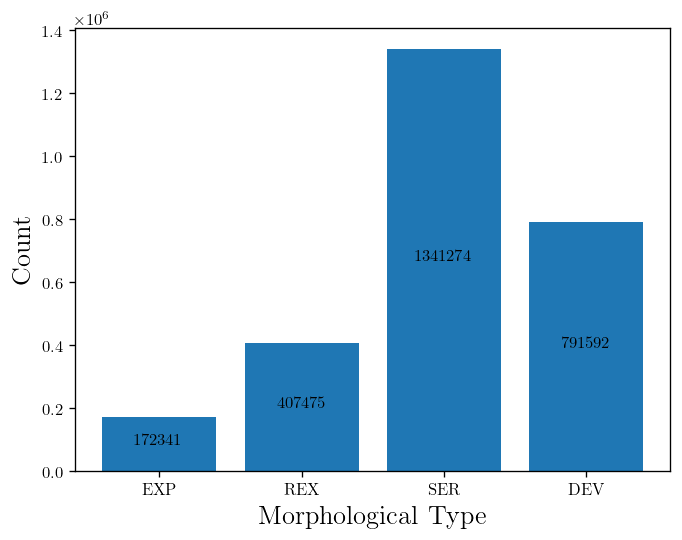

In [7]:
from collections import defaultdict

counter = defaultdict(int)
for typ in cut_tbl['TYPE']:
    counter[typ] += 1

def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha='center')

plt.bar(counter.keys(), counter.values())
addlabels(counter.keys(), list(counter.values()))
plt.xlabel('Morphological Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

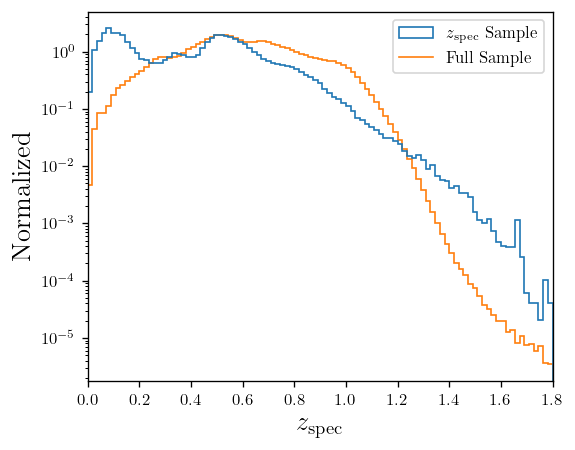

In [2]:
# Figure 2.1 Zou et al. 2022

plt.figure(figsize=(5, 4))
plt.hist(cut_tbl['spec_z'], bins=z_bins, density=True, 
         histtype='step', label=r'$z_{\rm spec}$ Sample')
plt.stairs(*photo_z_hist, fill=False, label='Full Sample')
plt.yscale('log')
plt.xlim(z_bins.min(), z_bins.max())
plt.xlabel(r'$z_{\rm spec}$', fontsize=16)
plt.ylabel('Normalized', fontsize=16)
plt.legend()
plt.show()

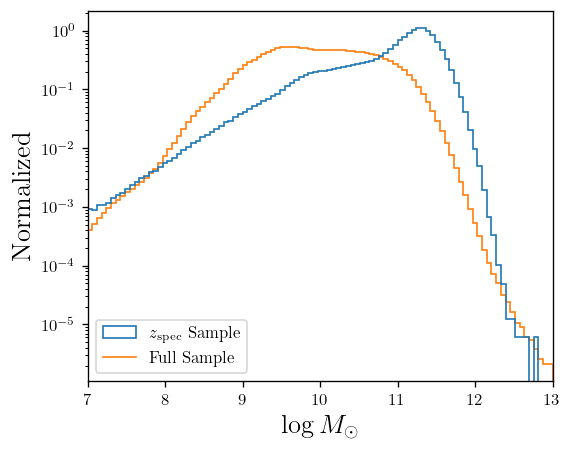

In [3]:
# M* distribution

plt.figure(figsize=(5, 4))
plt.hist(cut_tbl['MASS_BEST'], bins=mass_bins, density=True, 
         histtype='step', label=r'$z_{\rm spec}$ Sample')
plt.stairs(*mass_hist, fill=False, label='Full Sample')
plt.yscale('log')
plt.xlim(mass_bins.min(), mass_bins.max())

plt.xlabel(r'$\log M_\odot$', fontsize=16)
plt.ylabel('Normalized', fontsize=16)
plt.legend(loc=3)
plt.show()

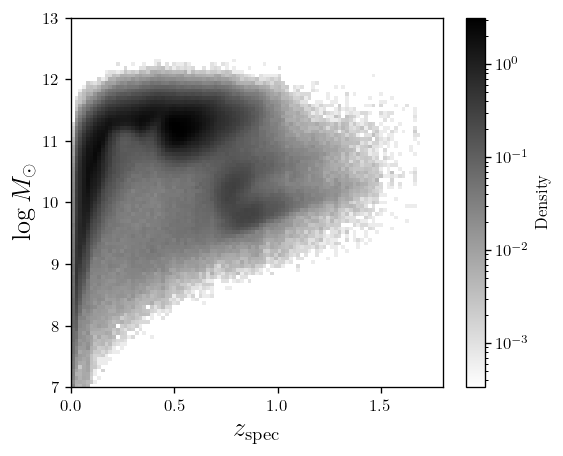

In [4]:
plt.figure(figsize=(5, 4))
c = plt.hist2d(cut_tbl['spec_z'], cut_tbl['MASS_BEST'], bins=joint_bins, 
               cmap='gray_r', norm='log', density=True)
plt.xlabel(r'$z_{\rm spec}$', fontsize=16)
plt.ylabel(r'$\log M_\odot$', fontsize=16)
plt.colorbar(label='Density')
plt.show()

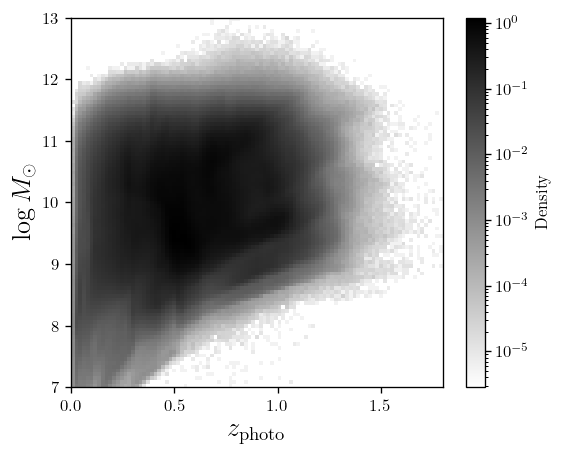

In [5]:
plt.figure(figsize=(5, 4))
X, Y = np.meshgrid(joint_hist[1], joint_hist[2])
plt.pcolormesh(X, Y, joint_hist[0].T, cmap='gray_r', norm='log')
plt.xlabel(r'$z_{\rm photo}$', fontsize=16)
plt.ylabel(r'$\log M_\odot$', fontsize=16)
plt.colorbar(label='Density')
plt.show()

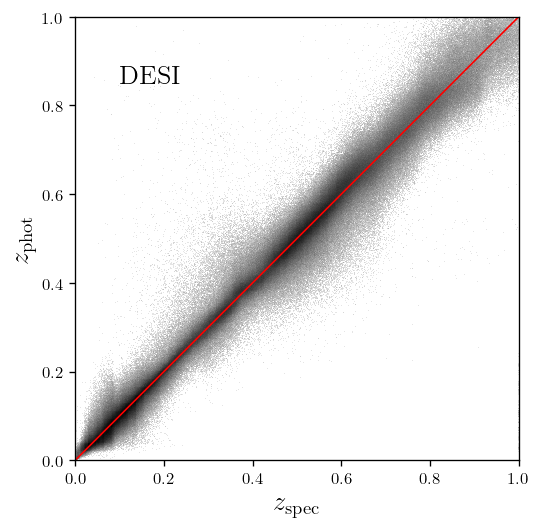

In [6]:
# Figure 3.1 Zou et al. 2022

x = np.linspace(0, 1., 500)
plt.hist2d(cut_tbl['spec_z'], cut_tbl['photo_z'], bins=(x, x), 
           cmap='gray_r', norm='log')
plt.plot(x, x, 'r', lw=1)
plt.gca().set_aspect('equal')
plt.text(0.1, 0.85, 'DESI', fontsize=16)
plt.xlabel(r'$z_{\rm spec}$', fontsize=16)
plt.ylabel(r'$z_{\rm phot}$', fontsize=16)
plt.show()